<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/13LRModelCatNoCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression based on Fundamental Approach
- Will use `kaggle` dataset of cat.
- This is based on the assignment of **Week-2** of **Deep Learning** Course by `Andrew Ng`

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

### Fetch Dataset from Kaggle
- Import data from Kaggle
- Use <a href="https://www.kaggle.com/muhammeddalkran/catvnoncat" target="_blank"> this Link </a>  

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

In [2]:
!ls

drive  sample_data


In [3]:
!pwd

/content


In [4]:
% cd drive/MyDrive/Colab Notebooks/AI-ipynb

/content/drive/MyDrive/Colab Notebooks/AI-ipynb


It throw error because the drive is not accessible to the colab. For this we have to mount the drive using the `Mount Drive` icon. It will ask for the permission which we have to allow so that Colab can access the Drive.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
% cd drive/MyDrive/Colab Notebooks/AI-ipynb

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/AI-ipynb'
/content/drive/MyDrive/Colab Notebooks/AI-ipynb


In [7]:
# Loading the data (cat/non-cat) from the File downloaded from the Kaggle
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")

In [8]:
for key in train_dataset.keys():
    print(key) #Names of the groups in HDF5 file.

list_classes
train_set_x
train_set_y


In [9]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

In [10]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(209,)


In [11]:
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

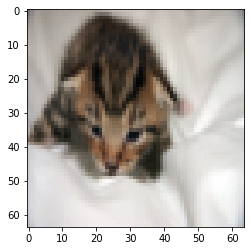

In [12]:
index = 1
plt.imshow(test_set_x_orig[index])

In [13]:
train_set_y.shape

(209,)

In [14]:
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

In [15]:
train_set_y.shape

(1, 209)

In [16]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
num_py=train_set_x_orig.shape[2]
print ("Number of training examples: m_train = ", m_train)
print ("Number of testing examples: m_test = ",m_test)
print ("Size of image in pixels: num_px, num_py = " + str(num_px) + "," + str(num_py))

Number of training examples: m_train =  209
Number of testing examples: m_test =  50
Size of image in pixels: num_px, num_py = 64,64


The shape of **`X`** matrix is $\mathcal {(nx, m)}$ where each columns represents the features of each training set; 

Where,   

$\mathcal {nx=px * py * 3}$ for the images as input and $m$ is the training examples.



So, we have to reshape to `train_set_x_orig` to `(nx,m_train)`. This will be achieved in two steps:   

***Step-1*** : Respahe `train_set_x_orig` to `(train_set_x_orig.shape[0],-1)`. -1 is used for unknown number of columns (known presently as `nx`)   
***Step-2*** : Transpose the matrix to get the desired dimension `(nx, m)`.

In [17]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape (test_set_x_orig.shape[0],-1).T

In [18]:
train_set_x_flatten.shape

(12288, 209)

Optimizing the parameters is best suited on the data of the same range. Let's normalize our dataset with the maximum possible pixel value i.e. 255.

In [19]:
x_train = train_set_x_flatten / 255.
y_train=train_set_y
x_test = test_set_x_flatten / 255.
y_train.shape

(1, 209)

## Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate loss (forward propagation)
    - Calculate gradient (backward propagation)
    - Update parameters (gradient descent)


In [20]:
learning_rate=0.005
max_iteration=4000

w=np.zeros(x_train.shape[0]).reshape(x_train.shape[0],1)
b=0.0
cost=np.zeros((max_iteration))

for i in range(max_iteration):
  z=np.dot(w.T, x_train+b)
  #print(z, z.shape)
  A=1/(1+np.exp(-z))
  #print(A, A.shape)
  cost[i]=-np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A)),axis=1)/m_train
  #print(" Cost", cost)
  dw=np.dot(x_train,(A-y_train).T)/m_train
  db=(np.sum((A-y_train), dtype=np.float64))/m_train
  #print("Gradients dw, b", dw,db)
  w=w-learning_rate*dw
  b=b-learning_rate*db
print(w, b)

[[ 0.01265371]
 [-0.03539427]
 [-0.01613788]
 ...
 [-0.01459773]
 [-0.03689638]
 [ 0.03423366]] -0.014158175046079496


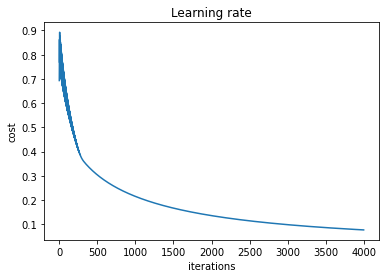

In [21]:
# Plot learning curve (with costs)
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate")
plt.show()

In [22]:

Y_prediction = np.zeros((1, m_train))
w = w.reshape(x_test.shape[0], 1)
z=np.dot(w.T, x_test+b)
A=1/(1+np.exp(-z))

for i in range(A.shape[1]):    
    if A[0,i] > 0.5:
        Y_prediction[0,i]=1
    else:
        Y_prediction[0,i]=0


In [23]:
Y_prediction

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])